In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [161]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [162]:
train["Sum_column"]=train["x_component_1"]+train["x_component_2"]+train["x_component_3"]+train["x_component_4"]+train["x_component_5"]
test["Sum_column"]=test["x_component_1"]+test["x_component_2"]+test["x_component_3"]+test["x_component_4"]+test["x_component_5"]


drop_list=["ymin","xmax",'grade_A_Component_1','pixel_area',"x_component_1","x_component_2","x_component_3","x_component_4","x_component_5"]
train.drop(drop_list,axis=1,inplace=True)
test.drop(drop_list,axis=1,inplace=True)


In [163]:
combined=pd.concat([train,test])
#combined.head(10)


In [164]:
train_sure=train[train["Sum_column"]==1]

train=train[train["Sum_column"]!=1]

In [167]:
train["xmin"].mean()

722.6408544726302

In [75]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier


In [76]:
X=train.drop(["class"],axis=1)
y=train["class"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [77]:
rf = XGBClassifier()
rf.fit(X_train,Y_train)
#print("Dropping column")
predictions = rf.predict_proba(X_test)
print("Log loss score " + log_loss(Y_test, predictions).astype(str))

Log loss score 0.7096549678207668


<Figure size 1440x720 with 0 Axes>

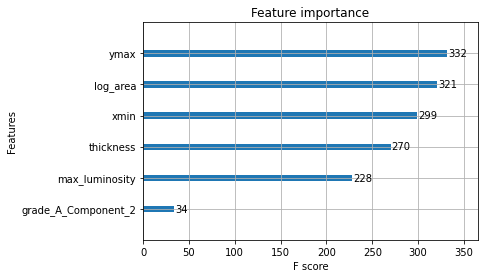

In [78]:
from xgboost import plot_importance
plt.figure(figsize=(20,10))
plot_importance(rf, max_num_features=10)

In [79]:
 
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
#rint("Dropping column")
predictions = rf.predict_proba(X_test)
print("Logg Loss" + log_loss(Y_test, predictions).astype(str))
score=round(rf.score(X_test, Y_test) * 100, 2)
print("Accuracy Score = "+score.astype(str))

Logg Loss0.507558323788849
Accuracy Score = 73.4


In [69]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train,Y_train)
predictions = model.predict_proba(X_test)

print("Log Loss" + log_loss(Y_test, predictions).astype(str))

#score=round(model.score(X_test, Y_test) * 100, 2)
#print("Accuracy Score = "+score.astype(str))


Learning rate set to 0.008049
0:	learn: 0.6896847	total: 96.7ms	remaining: 1m 36s
1:	learn: 0.6866012	total: 99.3ms	remaining: 49.6s
2:	learn: 0.6832351	total: 101ms	remaining: 33.7s
3:	learn: 0.6803705	total: 104ms	remaining: 26s
4:	learn: 0.6774268	total: 107ms	remaining: 21.3s
5:	learn: 0.6753821	total: 109ms	remaining: 18.1s
6:	learn: 0.6725061	total: 111ms	remaining: 15.7s
7:	learn: 0.6696030	total: 112ms	remaining: 13.9s
8:	learn: 0.6667475	total: 114ms	remaining: 12.5s
9:	learn: 0.6641028	total: 116ms	remaining: 11.5s
10:	learn: 0.6614983	total: 118ms	remaining: 10.6s
11:	learn: 0.6589433	total: 120ms	remaining: 9.88s
12:	learn: 0.6572480	total: 121ms	remaining: 9.16s
13:	learn: 0.6544854	total: 122ms	remaining: 8.58s
14:	learn: 0.6528010	total: 123ms	remaining: 8.04s
15:	learn: 0.6503362	total: 124ms	remaining: 7.61s
16:	learn: 0.6483301	total: 125ms	remaining: 7.21s
17:	learn: 0.6466741	total: 126ms	remaining: 6.86s
18:	learn: 0.6441214	total: 127ms	remaining: 6.55s
19:	learn:

283:	learn: 0.4263911	total: 474ms	remaining: 1.19s
284:	learn: 0.4260291	total: 481ms	remaining: 1.21s
285:	learn: 0.4256060	total: 482ms	remaining: 1.2s
286:	learn: 0.4251743	total: 484ms	remaining: 1.2s
287:	learn: 0.4248905	total: 485ms	remaining: 1.2s
288:	learn: 0.4246298	total: 487ms	remaining: 1.2s
289:	learn: 0.4242340	total: 490ms	remaining: 1.2s
290:	learn: 0.4239521	total: 491ms	remaining: 1.2s
291:	learn: 0.4236456	total: 493ms	remaining: 1.19s
292:	learn: 0.4230798	total: 494ms	remaining: 1.19s
293:	learn: 0.4227050	total: 495ms	remaining: 1.19s
294:	learn: 0.4223080	total: 496ms	remaining: 1.19s
295:	learn: 0.4217824	total: 497ms	remaining: 1.18s
296:	learn: 0.4214855	total: 498ms	remaining: 1.18s
297:	learn: 0.4211926	total: 499ms	remaining: 1.18s
298:	learn: 0.4208006	total: 500ms	remaining: 1.17s
299:	learn: 0.4204218	total: 501ms	remaining: 1.17s
300:	learn: 0.4200118	total: 502ms	remaining: 1.17s
301:	learn: 0.4197748	total: 503ms	remaining: 1.16s
302:	learn: 0.4193

543:	learn: 0.3501498	total: 858ms	remaining: 719ms
544:	learn: 0.3500281	total: 859ms	remaining: 717ms
545:	learn: 0.3498691	total: 861ms	remaining: 716ms
546:	learn: 0.3495630	total: 863ms	remaining: 714ms
547:	learn: 0.3493118	total: 864ms	remaining: 713ms
548:	learn: 0.3490943	total: 865ms	remaining: 711ms
549:	learn: 0.3489583	total: 866ms	remaining: 709ms
550:	learn: 0.3488347	total: 868ms	remaining: 707ms
551:	learn: 0.3487146	total: 870ms	remaining: 706ms
552:	learn: 0.3484079	total: 871ms	remaining: 704ms
553:	learn: 0.3480127	total: 873ms	remaining: 703ms
554:	learn: 0.3478691	total: 875ms	remaining: 701ms
555:	learn: 0.3474799	total: 877ms	remaining: 700ms
556:	learn: 0.3473544	total: 879ms	remaining: 699ms
557:	learn: 0.3471200	total: 880ms	remaining: 697ms
558:	learn: 0.3467945	total: 881ms	remaining: 695ms
559:	learn: 0.3465874	total: 883ms	remaining: 694ms
560:	learn: 0.3463354	total: 885ms	remaining: 693ms
561:	learn: 0.3459770	total: 887ms	remaining: 691ms
562:	learn: 

846:	learn: 0.2860069	total: 1.24s	remaining: 223ms
847:	learn: 0.2857441	total: 1.24s	remaining: 222ms
848:	learn: 0.2856249	total: 1.24s	remaining: 221ms
849:	learn: 0.2853933	total: 1.24s	remaining: 219ms
850:	learn: 0.2852348	total: 1.24s	remaining: 218ms
851:	learn: 0.2850127	total: 1.25s	remaining: 216ms
852:	learn: 0.2846187	total: 1.25s	remaining: 215ms
853:	learn: 0.2844428	total: 1.25s	remaining: 213ms
854:	learn: 0.2841290	total: 1.25s	remaining: 212ms
855:	learn: 0.2839648	total: 1.25s	remaining: 210ms
856:	learn: 0.2838698	total: 1.25s	remaining: 209ms
857:	learn: 0.2836281	total: 1.25s	remaining: 207ms
858:	learn: 0.2833476	total: 1.25s	remaining: 206ms
859:	learn: 0.2830512	total: 1.25s	remaining: 204ms
860:	learn: 0.2828841	total: 1.25s	remaining: 203ms
861:	learn: 0.2824611	total: 1.26s	remaining: 201ms
862:	learn: 0.2822440	total: 1.26s	remaining: 200ms
863:	learn: 0.2819520	total: 1.26s	remaining: 198ms
864:	learn: 0.2818873	total: 1.26s	remaining: 197ms
865:	learn: 

In [1092]:
columns=train.columns
columns=columns.drop(['class'])
#columns.remove('class')
for i in columns:
    new_df=train.drop(i,axis=1)
    X=new_df.drop(["class"],axis=1)
    y=new_df["class"]
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.25,random_state=42)
    rf = XGBClassifier()
    rf.fit(X_train,Y_train)
    print("Dropping column",i)
    predictions = rf.predict_proba(X_test)
    print("F1 score " + log_loss(Y_test, predictions).astype(str))
    

Dropping column grade_A_Component_2
F1 score 0.7024406487132588
Dropping column max_luminosity
F1 score 0.7134076987600333
Dropping column thickness
F1 score 0.6674180574301956
Dropping column xmin
F1 score 0.736515580512787
Dropping column ymax
F1 score 0.7041651783719646
Dropping column log_area
F1 score 0.7008228404585215
Dropping column Sum_column
F1 score 0.7080579513059925


In [1064]:
get_feature_importance(data=None,
                       type=EFstrType.FeatureImportance,
                       prettified=False,
                       thread_count=-1,
                       verbose=False)

NameError: name 'get_feature_importance' is not defined

In [898]:
# model=LGBMClassifier()
# model.fit(X_train,Y_train)
# predictions = model.predict_proba(X_test)

# print("Log Loss" + log_loss(Y_test, predictions).astype(str))

# #score=round(model.score(X_test, Y_test) * 100, 2)

Log Loss0.6071647940880783


# Submission

In [965]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X,y)
predictions = model.predict_proba(test)

#print("Log Loss" + log_loss(Y_test, predictions).astype(str))

answer=pd.DataFrame(predictions,columns=['1','2'])
#score=round(model.score(X_test, Y_test) * 100, 2)
#print("Accuracy Score = "+score.astype(str))


Learning rate set to 0.009106
0:	learn: 0.6901839	total: 2.67ms	remaining: 2.67s
1:	learn: 0.6869042	total: 5.5ms	remaining: 2.74s
2:	learn: 0.6839519	total: 7.53ms	remaining: 2.5s
3:	learn: 0.6815969	total: 9.52ms	remaining: 2.37s
4:	learn: 0.6782907	total: 13.2ms	remaining: 2.63s
5:	learn: 0.6757332	total: 15.6ms	remaining: 2.59s
6:	learn: 0.6721617	total: 17.8ms	remaining: 2.53s
7:	learn: 0.6688592	total: 21.5ms	remaining: 2.67s
8:	learn: 0.6654401	total: 24.2ms	remaining: 2.67s
9:	learn: 0.6624224	total: 26.4ms	remaining: 2.61s
10:	learn: 0.6597921	total: 27.7ms	remaining: 2.49s
11:	learn: 0.6568290	total: 30.2ms	remaining: 2.48s
12:	learn: 0.6553522	total: 31.6ms	remaining: 2.4s
13:	learn: 0.6529351	total: 34.5ms	remaining: 2.43s
14:	learn: 0.6503334	total: 37.3ms	remaining: 2.45s
15:	learn: 0.6476352	total: 39.6ms	remaining: 2.44s
16:	learn: 0.6451866	total: 41.7ms	remaining: 2.41s
17:	learn: 0.6423085	total: 45.5ms	remaining: 2.48s
18:	learn: 0.6403576	total: 51.6ms	remaining: 2

193:	learn: 0.4643528	total: 578ms	remaining: 2.4s
194:	learn: 0.4638191	total: 583ms	remaining: 2.41s
195:	learn: 0.4634875	total: 585ms	remaining: 2.4s
196:	learn: 0.4628873	total: 587ms	remaining: 2.39s
197:	learn: 0.4624972	total: 593ms	remaining: 2.4s
198:	learn: 0.4619736	total: 598ms	remaining: 2.4s
199:	learn: 0.4612960	total: 599ms	remaining: 2.4s
200:	learn: 0.4606999	total: 602ms	remaining: 2.39s
201:	learn: 0.4603178	total: 603ms	remaining: 2.38s
202:	learn: 0.4598350	total: 610ms	remaining: 2.39s
203:	learn: 0.4592165	total: 612ms	remaining: 2.39s
204:	learn: 0.4586830	total: 614ms	remaining: 2.38s
205:	learn: 0.4582805	total: 616ms	remaining: 2.38s
206:	learn: 0.4577890	total: 618ms	remaining: 2.37s
207:	learn: 0.4573044	total: 629ms	remaining: 2.39s
208:	learn: 0.4566555	total: 631ms	remaining: 2.39s
209:	learn: 0.4563663	total: 633ms	remaining: 2.38s
210:	learn: 0.4560002	total: 635ms	remaining: 2.37s
211:	learn: 0.4556423	total: 640ms	remaining: 2.38s
212:	learn: 0.455

379:	learn: 0.3950930	total: 1.14s	remaining: 1.87s
380:	learn: 0.3948664	total: 1.15s	remaining: 1.86s
381:	learn: 0.3945419	total: 1.16s	remaining: 1.87s
382:	learn: 0.3943341	total: 1.16s	remaining: 1.87s
383:	learn: 0.3940611	total: 1.16s	remaining: 1.87s
384:	learn: 0.3938322	total: 1.17s	remaining: 1.86s
385:	learn: 0.3934896	total: 1.17s	remaining: 1.86s
386:	learn: 0.3932505	total: 1.17s	remaining: 1.86s
387:	learn: 0.3930836	total: 1.18s	remaining: 1.86s
388:	learn: 0.3927467	total: 1.18s	remaining: 1.85s
389:	learn: 0.3925161	total: 1.19s	remaining: 1.85s
390:	learn: 0.3923640	total: 1.19s	remaining: 1.85s
391:	learn: 0.3921251	total: 1.19s	remaining: 1.85s
392:	learn: 0.3918032	total: 1.19s	remaining: 1.84s
393:	learn: 0.3915018	total: 1.19s	remaining: 1.84s
394:	learn: 0.3910979	total: 1.2s	remaining: 1.84s
395:	learn: 0.3908914	total: 1.2s	remaining: 1.84s
396:	learn: 0.3906708	total: 1.21s	remaining: 1.83s
397:	learn: 0.3905143	total: 1.21s	remaining: 1.83s
398:	learn: 0.

587:	learn: 0.3429313	total: 1.72s	remaining: 1.2s
588:	learn: 0.3427201	total: 1.72s	remaining: 1.2s
589:	learn: 0.3427200	total: 1.72s	remaining: 1.2s
590:	learn: 0.3425142	total: 1.72s	remaining: 1.19s
591:	learn: 0.3423973	total: 1.72s	remaining: 1.19s
592:	learn: 0.3422036	total: 1.73s	remaining: 1.19s
593:	learn: 0.3419977	total: 1.73s	remaining: 1.19s
594:	learn: 0.3418388	total: 1.74s	remaining: 1.18s
595:	learn: 0.3416129	total: 1.74s	remaining: 1.18s
596:	learn: 0.3414025	total: 1.74s	remaining: 1.18s
597:	learn: 0.3411200	total: 1.74s	remaining: 1.17s
598:	learn: 0.3406788	total: 1.75s	remaining: 1.17s
599:	learn: 0.3403607	total: 1.75s	remaining: 1.17s
600:	learn: 0.3402033	total: 1.75s	remaining: 1.16s
601:	learn: 0.3398381	total: 1.75s	remaining: 1.16s
602:	learn: 0.3395415	total: 1.76s	remaining: 1.16s
603:	learn: 0.3393295	total: 1.76s	remaining: 1.15s
604:	learn: 0.3390920	total: 1.76s	remaining: 1.15s
605:	learn: 0.3388335	total: 1.76s	remaining: 1.15s
606:	learn: 0.3

812:	learn: 0.2961515	total: 2.28s	remaining: 525ms
813:	learn: 0.2958807	total: 2.29s	remaining: 523ms
814:	learn: 0.2956697	total: 2.29s	remaining: 521ms
815:	learn: 0.2955125	total: 2.29s	remaining: 518ms
816:	learn: 0.2952360	total: 2.3s	remaining: 515ms
817:	learn: 0.2950388	total: 2.3s	remaining: 512ms
818:	learn: 0.2948483	total: 2.3s	remaining: 509ms
819:	learn: 0.2947111	total: 2.31s	remaining: 506ms
820:	learn: 0.2944890	total: 2.31s	remaining: 503ms
821:	learn: 0.2942172	total: 2.31s	remaining: 500ms
822:	learn: 0.2939739	total: 2.31s	remaining: 497ms
823:	learn: 0.2937370	total: 2.31s	remaining: 494ms
824:	learn: 0.2936078	total: 2.32s	remaining: 492ms
825:	learn: 0.2934538	total: 2.32s	remaining: 489ms
826:	learn: 0.2932402	total: 2.32s	remaining: 486ms
827:	learn: 0.2931161	total: 2.33s	remaining: 483ms
828:	learn: 0.2929828	total: 2.33s	remaining: 480ms
829:	learn: 0.2927428	total: 2.33s	remaining: 477ms
830:	learn: 0.2925579	total: 2.33s	remaining: 474ms
831:	learn: 0.2

In [967]:
answer["sum_count"]=test["Sum_column"]

In [968]:
answer["1"][answer["sum_count"]==1]=1.0
answer["2"][answer["sum_count"]==1]=0.0

/home/bhavesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/bhavesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [970]:
answer.drop(["sum_count"],axis=1,inplace=True)

In [972]:
answer.head(20)

,1,2
0,1.000000,0.000000
1,0.177834,0.822166
2,1.000000,0.000000
3,1.000000,0.000000
4,0.522207,0.477793
5,1.000000,0.000000
6,1.000000,0.000000
7,1.000000,0.000000
8,1.000000,0.000000
9,0.259410,0.740590


In [777]:
answer.to_excel("answer_drop_catboost.xlsx")